In [ ]:
!git clone --recursive https://github.com/zaitra/methane-filters-benchmark.git
%cd ./methane-filters-benchmark

In [16]:
!pip install spectral numpy pysptools rasterio tifffile tqdm imagecodecs

#kornia is used for measuring the morphological baseline runtime, but it comes with lot of dependencies which are not needed for sake of this demo.

#Uncomment this if you want to measure runtime of the baseline.
#!pip install kornia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
   

In [19]:
!pip list | grep -E "spectral|numpy|pysptools|rasterio|tifffile|tqdm|imagecodecs|kornia"

imagecodecs                           2025.3.30
kornia                                0.8.1
kornia_rs                             0.1.9
numpy                                 2.0.2
pysptools                             0.15.0
rasterio                              1.4.3
spectral                              0.24
tifffile                              2025.5.21
tqdm                                  4.67.1


In [20]:
!python --version

Python 3.11.12


# Measuring Time

This script measures the runtime of the filters and also compares the outputs of the optimized and unoptimized versions of the filters.

This is only a showcase. The script should be run on the edge device to obtain representative time measurements.

In [21]:
!python3 ./benchmark/test_sped_up_filters.py --channels 72 --compute-original-filters
!python3 ./benchmark/test_sped_up_filters.py --channels 72 --compute-original-mag1c

File size: 125.00 MB
Loading hyperspectral image from resources/test_tile_512_512_125.hdr..., selected channels N: 72
resources/test_tile_512_512_125.hdr
Initial_shape:  (512, 512, 125)
After channel selection:  (512, 512, 72)
Compute Original Mag1c:  False
Computing Tile-wise Mag1c...
MAG1C Output:

Filter processing completed in 15.22019076347351 seconds.

Filter processing completed in 13.8932204246521 seconds (measured similarly as for other filters).

Computing Tile-wise and Sampled Mag1c...
MAG1C Output:
Computation Done! Processing time: 0.4267 seconds

Filter processing completed in 1.3159143924713135 seconds.

Filter processing completed in 0.4266624450683594 seconds (measured similarly as for other filters).

Loading methane spectrum for generated file from mag1c: mag1c_spectrum.npy...
Computing with precision: float<class 'numpy.float64'>
Computing ACE_optimized...
ACE_optimized Computation Done! Processing time: 1.4907 seconds
Computing ACE_original...
ACE_original Computat

# Product Creation

This section showcases the core script that processes raw STARCOP data and generates products from it.  
The example focuses on a strong plume, which is both processed and visualized here.

In [22]:
import os
!gdown 1XPnxp0cL7Kiq65GdpxDy88OaNSublYNl
os.makedirs("./STARCOP_all_bands_one_tile")
!unzip STARCOP_all_bands_one_tile.zip -d ./STARCOP_all_bands_one_tile
!rm STARCOP_all_bands_one_tile.zip

Downloading...
From (original): https://drive.google.com/uc?id=1XPnxp0cL7Kiq65GdpxDy88OaNSublYNl
From (redirected): https://drive.google.com/uc?id=1XPnxp0cL7Kiq65GdpxDy88OaNSublYNl&confirm=t&uuid=a7730417-2190-4a04-b16d-66b5e7bb55ff
To: /content/methane-filters-benchmark/STARCOP_all_bands_one_tile.zip
100% 117M/117M [00:01<00:00, 70.3MB/s]
Archive:  STARCOP_all_bands_one_tile.zip
   creating: ./STARCOP_all_bands_one_tile/ang20191025t165545_r6573_c24_w151_h151/
  inflating: ./STARCOP_all_bands_one_tile/__MACOSX/._ang20191025t165545_r6573_c24_w151_h151  
  inflating: ./STARCOP_all_bands_one_tile/ang20191025t165545_r6573_c24_w151_h151/TOA_AVIRIS_2249nm.tif  
  inflating: ./STARCOP_all_bands_one_tile/ang20191025t165545_r6573_c24_w151_h151/TOA_AVIRIS_1673nm.tif  
  inflating: ./STARCOP_all_bands_one_tile/ang20191025t165545_r6573_c24_w151_h151/TOA_AVIRIS_2129nm.tif  
  inflating: ./STARCOP_all_bands_one_tile/ang20191025t165545_r6573_c24_w151_h151/TOA_AVIRIS_2290nm.tif  
  inflating: ./STARCO

In [23]:
import yaml
print(os.listdir("./"))
path = "benchmark/cfg/one_tile.yaml"
with open(path, 'r') as f:
        config = yaml.safe_load(f)
print(config)
# Update specified fields
config['csv_path'] = "./STARCOP_all_bands_one_tile/test.csv"
config['input_data_path'] = "./STARCOP_all_bands_one_tile/"
config["output_data_path"] = "output_show"

with open(path, 'w') as f:
    yaml.safe_dump(
        config,
        f,
        sort_keys=False,              # preserve original key order
        default_flow_style=None       # keeps some inline formatting, e.g. lists
    )

['mag1c_centers.npy', 'benchmark', '.gitmodules', '.git', 'resources', 'playbook.ipynb', 'STARCOP_all_bands_one_tile', 'LICENSE', 'csvs', 'ntbs', 'mag1c_spectrum.npy', '.gitignore', 'README.md']
{'COLUMN': False, 'CREATE_TILE_MAG1C': True, 'CREATE_SAMPLED_MAG1C': True, 'SAMPLE_PERCENT': 0.01, 'SELECT_BANDS': False, 'BANDS_N': 72, 'STRATEGY': 'highest-transmittance', 'CREATE_OTHER_FILTERS': True, 'RESUME': False, 'PRECISION': 64, 'USE_SPED_UP_VERSIONS_OF_FILTERS': True, 'wavelengths_range': [2122, 2488], 'csv_path': './STARCOP_all_bands_one_tile/test.csv', 'input_data_path': './STARCOP_all_bands_one_tile/', 'output_data_path': 'output_show'}


In [24]:
!python3 ./benchmark/create_filters_for_starcop.py --config benchmark/cfg/one_tile.yaml

1it [00:00, 92.66it/s]
The wavelengths data are same across all tiles.
The wavelengths data from the spectrum file matches the loaded bands.
  0% 0/1 [00:00<?, ?it/s]MAG1C Output:
Beginning processing of 0ac9bea5
Using compute device: cpu.
Computing with precision float64. Output will be written as float32.
Opening radiance data file.
Target spectrum generated successfully.
Checking that the provided target is compatible with the data file wavelengths...
Target spectrum checks complete.
Filter output will be written to 0ac9bea5_ch4_cmfr.hdr
Beginning main filtering, to be completed in 1 steps:
1, Computation Done! Processing time: 11.7999 seconds

Filter processing completed in 12.69048261642456 seconds.

Filter processing completed in 11.799943208694458 seconds (measured similarly as for other filters).
Done with all requested processing for 0ac9bea5

MAG1C Output:
Beginning processing of 0ac9bea5
Using compute device: cpu.
Computing with precision float64. Output will be written as f

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/mag1c_tile.tif


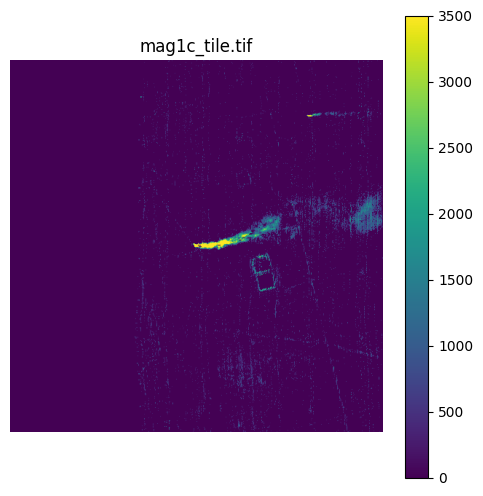

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/labelbinary.tif


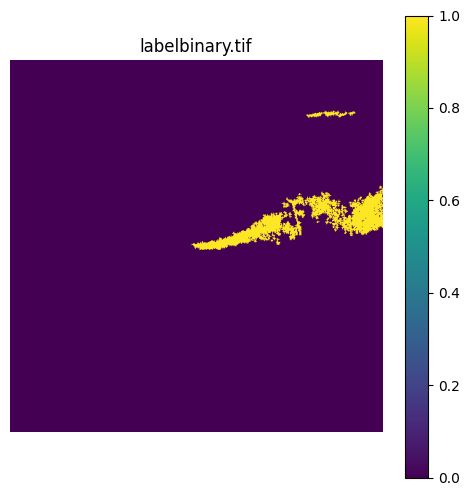

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/ace.tif


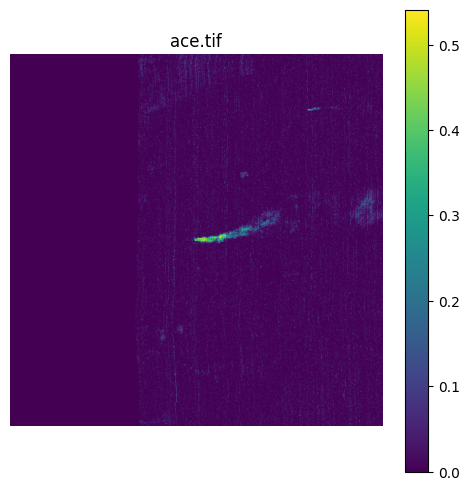

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/valid_mask.tif


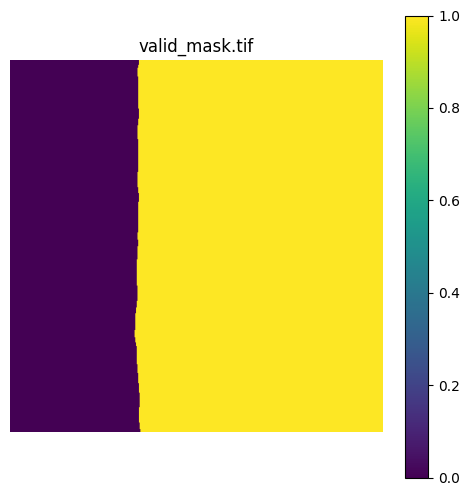

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/mag1c_tile_sampled-0.01.tif


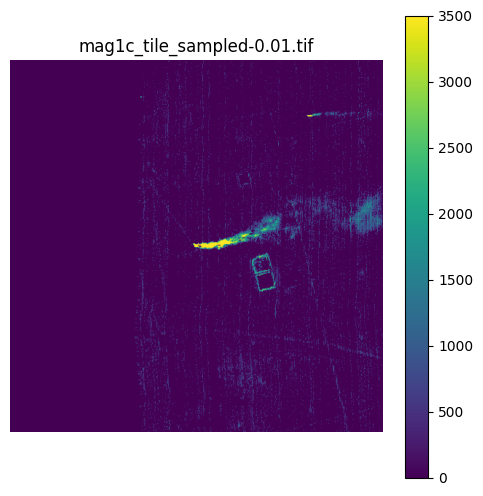

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/mf.tif


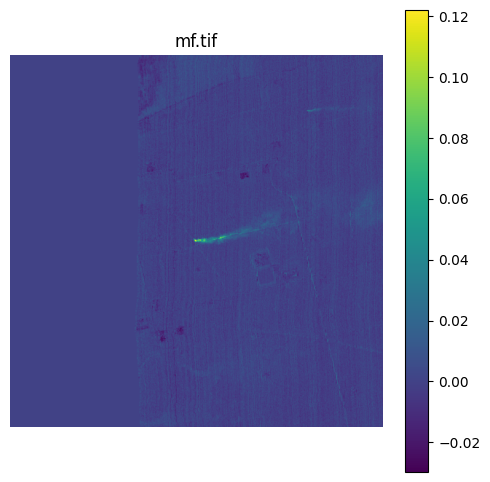

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/cem.tif


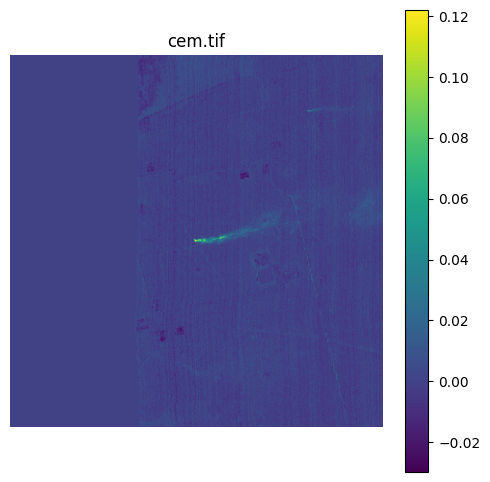

Displaying: ./STARCOP_all_bands_one_tile/ang20191025t165545_r6573_c24_w151_h151/mag1c.tif


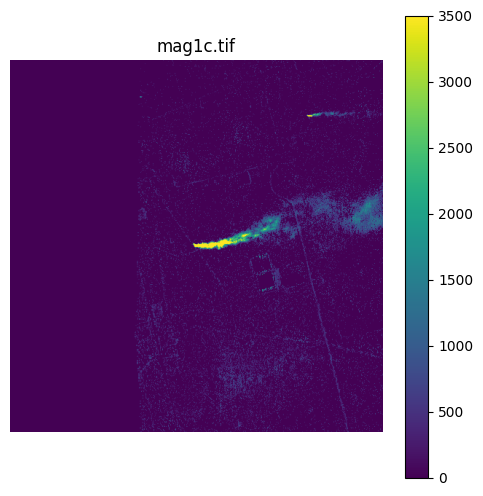

In [25]:
import os
import matplotlib.pyplot as plt
import rasterio
import numpy as np

# Set the directory containing the .tif files
tif_directory = config["output_data_path"]  # Change this if needed

# Traverse the directory
for root, dirs, files in os.walk(tif_directory):
    for file in files:
        if file.lower().endswith((".tif")):
            file_path = os.path.join(root, file)
            print(f"Displaying: {file_path}")

            # Open and read the image
            with rasterio.open(file_path) as src:
                img = src.read(1)  # Read the first band
            if "mag1c" in file:
                img = np.clip(img,0,3500)
            # Plot the image
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(file)
            plt.colorbar()
            plt.axis('off')
            plt.show()

#Print original mag1c for comparison
for root, dirs, files in os.walk(config['input_data_path']):
    for file in files:
        if "mag1c.tif" == file:
            file_path = os.path.join(root, file)
            print(f"Displaying: {file_path}")

            # Open and read the image
            with rasterio.open(file_path) as src:
                img = src.read(1)  # Read the first band
                img = np.clip(img,0,3500)
            # Plot the image
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(file)
            plt.colorbar()
            plt.axis('off')
            plt.show()
